In [4]:
from bs4 import BeautifulSoup
from selenium import webdriver
import re

driver = webdriver.Chrome()
driver.get('https://finance.naver.com/item/coinfo.naver?code=035720')

driver.switch_to.frame('coinfo_cp')

html = driver.page_source
soup =BeautifulSoup(html,'html.parser')
tbody_tag = soup.find_all('tbody')
print(tbody_tag)

[<tbody><tr class="cmp-table-row">
<td class="cmp-table-cell td0101">
<dl>
<dt>
<span class="name">카카오</span>
<a class="cEm" href="http://www.kakaocorp.com" target="comPage" title="[홈페이지] www.kakaocorp.com"><img align="absmiddle" hspace="3" src="/images/icon_home.gif"/></a>
[주식담당] 1577-3321"><img align="absmiddle" hspace="1" src="/images/icon_tel.gif"/></a>
<b class="num">035720</b>
</dt>
<dt class="line-left">Kakao</dt>
<dt class="line-left">KOSPI : 서비스업</dt>
<dt class="line-left">WICS : 양방향미디어와서비스</dt>
</dl>
</td>
</tr>
<tr class="cmp-table-row">
<td class="cmp-table-cell td0201">
<div> </div>
</td>
</tr>
<tr class="cmp-table-row">
<td class="cmp-table-cell td0301">
<dl>
<dt>EPS <b class="num">-2,286</b></dt>
<dt class="line-left">BPS <b class="num">22,508</b></dt>
<dt class="line-left">PER <b class="num">N/A</b></dt>
<dt class="line-left">업종PER <b class="num">108.08</b></dt>
<dt class="line-left">PBR <b class="num">1.63</b></dt>
<dt class="line-left">현금배당수익률 <b class="num">0.17%</b>

In [5]:
text_data = tbody_tag[17].text
text_data

'\n2021(A)\n59,105\n45.17\n5,879\n13,873\n3,121\n36.04\n4.90\n17.08\n48.79\n-24.08\nIFRS연결\n2022(A)\n67,987\n15.03\n5,694\n13,580\n3,049\n17.42\n2.32\n13.62\n18.47\n-17.72\nIFRS연결\n2023(A)\n75,570\n11.15\n4,609\n-10,126\n-2,276\nN/A\n2.44\n-10.26\n17.65\n-18.70\nIFRS연결\n2024(E)\n82,500\n9.17\n5,673\n3,782\n852\n43.21\n1.58\n3.79\n9.93\n-18.45\nIFRS연결\n2025(E)\n90,011\n9.10\n7,010\n5,126\n1,156\n31.84\n1.51\n4.90\n9.12\n-22.38\nIFRS연결\n\n'

In [6]:
item_list = []
remove_span = re.split(r'\n|\n', text_data)
for word in remove_span:
    if word !='':
        item_list.append(word)

In [7]:
import pandas as pd
item_list

['2021(A)',
 '59,105',
 '45.17',
 '5,879',
 '13,873',
 '3,121',
 '36.04',
 '4.90',
 '17.08',
 '48.79',
 '-24.08',
 'IFRS연결',
 '2022(A)',
 '67,987',
 '15.03',
 '5,694',
 '13,580',
 '3,049',
 '17.42',
 '2.32',
 '13.62',
 '18.47',
 '-17.72',
 'IFRS연결',
 '2023(A)',
 '75,570',
 '11.15',
 '4,609',
 '-10,126',
 '-2,276',
 'N/A',
 '2.44',
 '-10.26',
 '17.65',
 '-18.70',
 'IFRS연결',
 '2024(E)',
 '82,500',
 '9.17',
 '5,673',
 '3,782',
 '852',
 '43.21',
 '1.58',
 '3.79',
 '9.93',
 '-18.45',
 'IFRS연결',
 '2025(E)',
 '90,011',
 '9.10',
 '7,010',
 '5,126',
 '1,156',
 '31.84',
 '1.51',
 '4.90',
 '9.12',
 '-22.38',
 'IFRS연결']

In [8]:
# value_dict 만들기
value_dict = {'영업이익':[item_list[3],item_list[15],item_list[27]],
              'PER':[item_list[6],item_list[18],item_list[30]],
              'PBR':[item_list[7],item_list[19],item_list[31]],
              'ROE':[item_list[8],item_list[20],item_list[32]]}

In [9]:
print(value_dict)
value_DF=pd.DataFrame(value_dict,index=['2021','2022','2023'])
import matplotlib.pyplot as plt
import koreanize_matplotlib
value_DF['PER']['2023'] = 0
value_DF

{'영업이익': ['5,879', '5,694', '4,609'], 'PER': ['36.04', '17.42', 'N/A'], 'PBR': ['4.90', '2.32', '2.44'], 'ROE': ['17.08', '13.62', '-10.26']}


C:\Users\KDP-14\AppData\Local\Temp\ipykernel_12856\1584260372.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  value_DF['PER']['2023'] = 0


,영업이익,PER,PBR,ROE
2021,"5,879",36.04,4.90,17.08
2022,"5,694",17.42,2.32,13.62
2023,"4,609",0,2.44,-10.26


In [10]:
value_DF['영업이익']=value_DF['영업이익'].replace(',', '', regex=True).astype(int)
value_DF['PER']=value_DF['PER'].astype(float)
value_DF['PBR']=value_DF['PBR'].astype(float)
value_DF['ROE']=value_DF['ROE'].astype(float)

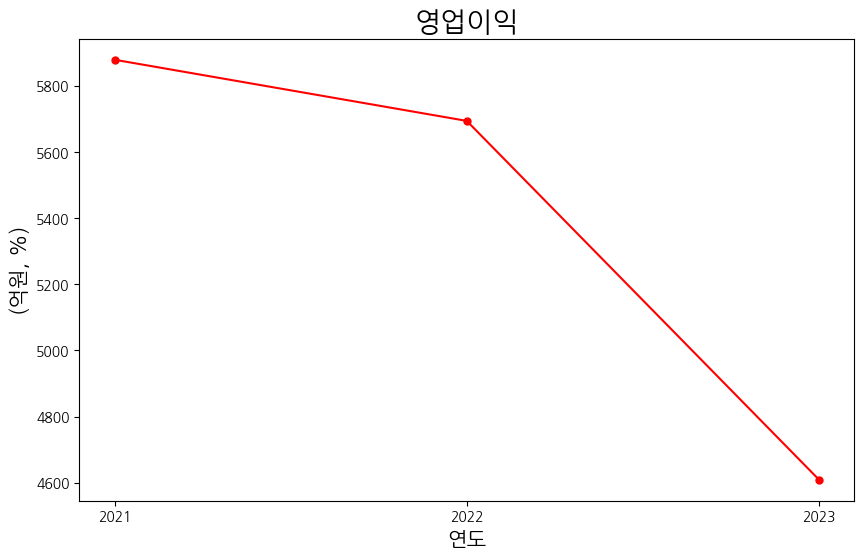

In [11]:
# 영업이익 그래프 그리기
plt.figure(figsize=(10,6))
plt.plot(value_DF['영업이익'],marker='o',ms=5,color='r')
plt.ylabel('(억원, %)',fontsize=15)
plt.xlabel('연도',fontsize=15)
plt.title('영업이익',fontsize=20)
plt.show()

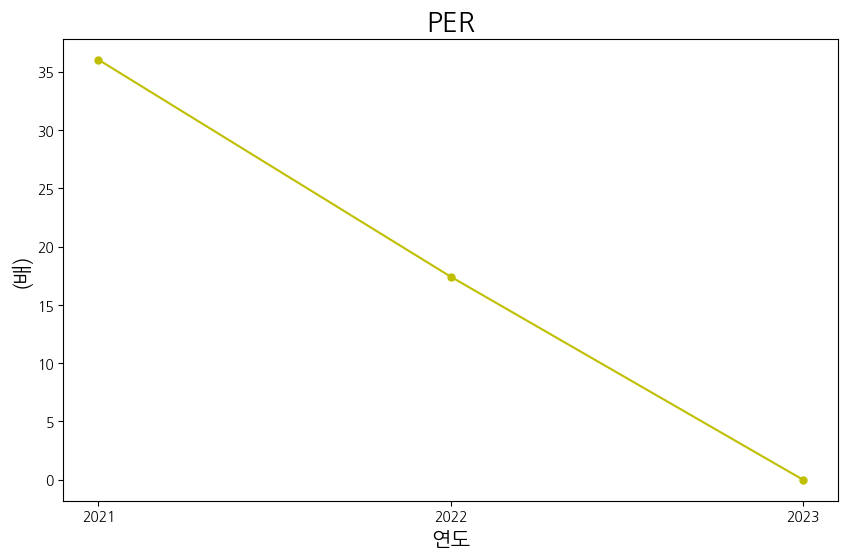

In [12]:
# PER 그래프 그리기
plt.figure(figsize=(10,6))
plt.plot(value_DF['PER'],marker='o',ms=5,color='y')
plt.ylabel('(배)',fontsize=15)
plt.xlabel('연도',fontsize=15)
plt.title('PER',fontsize=20)
plt.show()

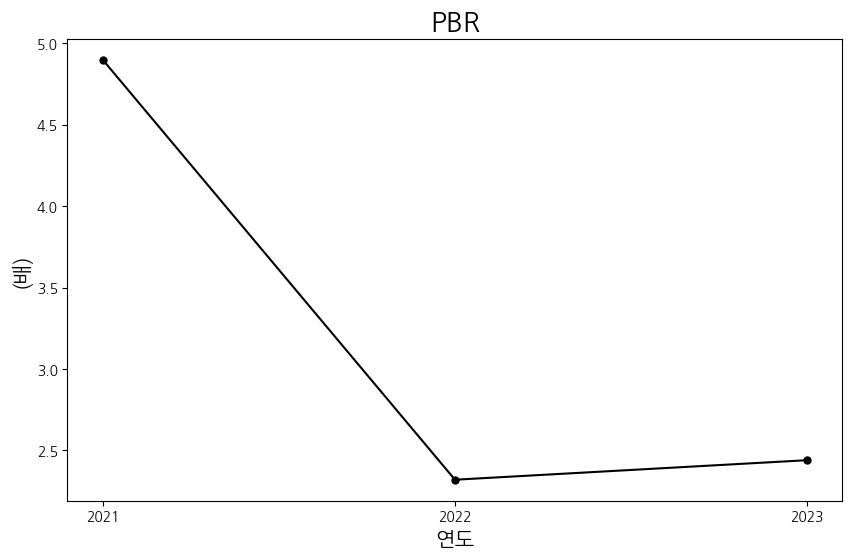

In [13]:
# PBR 그래프 그리기
plt.figure(figsize=(10,6))
plt.plot(value_DF['PBR'],marker='o',ms=5,color='k')
plt.ylabel('(배)',fontsize=15)
plt.xlabel('연도',fontsize=15)
plt.title('PBR',fontsize=20)
plt.show()

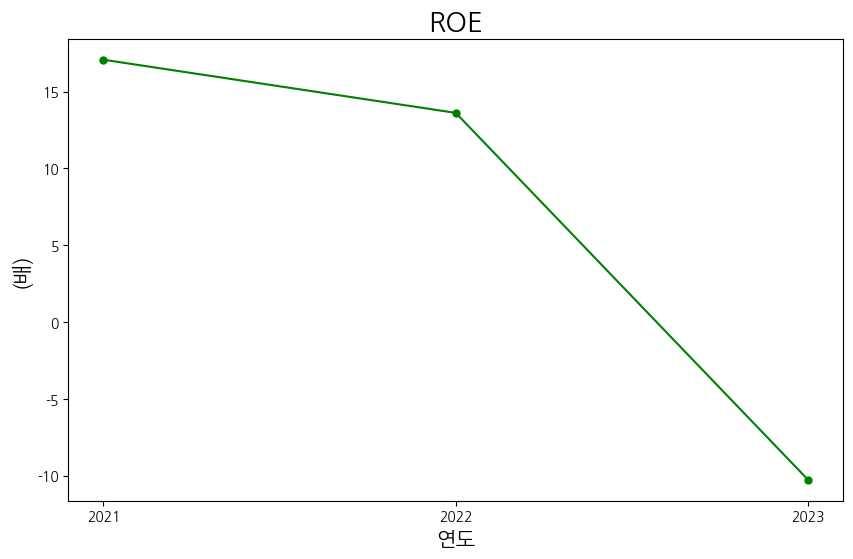

In [14]:
#ROE 그래프 그리기
plt.figure(figsize=(10,6))
plt.plot(value_DF['ROE'],marker='o',ms=5,color='g')
plt.ylabel('(배)',fontsize=15)
plt.xlabel('연도',fontsize=15)
plt.title('ROE',fontsize=20)
plt.show()